In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.pipeline import make_pipeline

## Exercise 18

In [2]:
# Load dataset from Training_Set.mat file
data = scipy.io.loadmat('Training_Set.mat')
print("Keys in .mat file:", data.keys())

x = data['X'].flatten()  # Use the actual key name from output
y = data['y'].flatten()

print("Loaded dataset: x shape =", x.shape, ", y shape =", y.shape)

Keys in .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
Loaded dataset: x shape = (10,) , y shape = (10,)


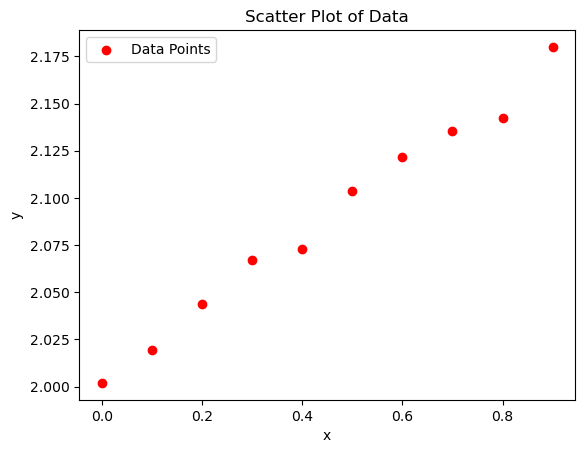

In [3]:
# Plot data
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

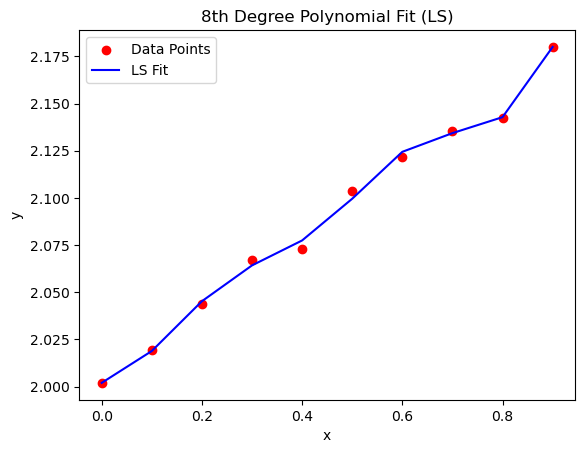

LS Coefficients: [ 0.00000000e+00  2.59408163e-01 -3.83248362e+00  4.94205642e+01
 -2.62206857e+02  6.98304163e+02 -9.86590551e+02  7.06143362e+02
 -2.01450791e+02]


In [4]:
# Fit 8th-degree polynomial using Least Squares Estimator
poly_degree = 8
poly_LS = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
poly_LS.fit(x[:, np.newaxis], y)
y_pred_LS = poly_LS.predict(x[:, np.newaxis])

plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y_pred_LS, label='LS Fit', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('8th Degree Polynomial Fit (LS)')
plt.legend()
plt.show()

print("LS Coefficients:", poly_LS.named_steps['linearregression'].coef_)

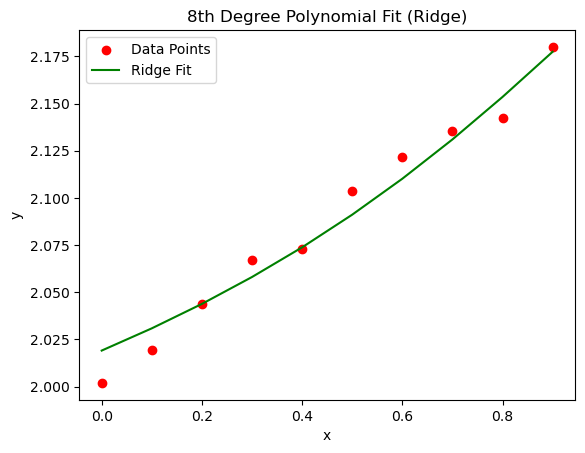

Ridge Coefficients: [ 0.          0.1124223   0.05172593  0.02058668  0.00609431 -0.00017001
 -0.00243389 -0.00279937 -0.00232629]


In [5]:
# Ridge Regression with 8th-degree polynomial
ridge = Ridge(alpha=0.1)
poly_ridge = make_pipeline(PolynomialFeatures(poly_degree), ridge)
poly_ridge.fit(x[:, np.newaxis], y)
y_pred_ridge = poly_ridge.predict(x[:, np.newaxis])

plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y_pred_ridge, label='Ridge Fit', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('8th Degree Polynomial Fit (Ridge)')
plt.legend()
plt.show()

print("Ridge Coefficients:", poly_ridge.named_steps['ridge'].coef_)

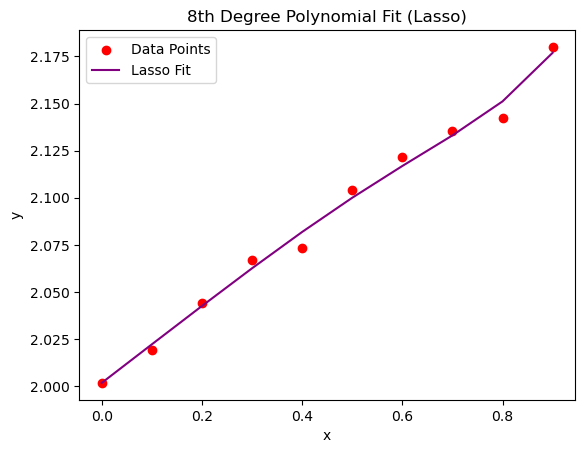

Lasso Coefficients: [ 0.          0.05874861 -0.         -0.         -0.01474255 -0.
 -0.          0.          0.01125921]


In [9]:
# Try reducing alpha to prevent over-regularization
lasso = Lasso(alpha=0.0001, max_iter=10000)  # Decrease alpha
poly_lasso = make_pipeline(PolynomialFeatures(poly_degree), StandardScaler(), lasso)
poly_lasso.fit(x[:, np.newaxis], y)
y_pred_lasso = poly_lasso.predict(x[:, np.newaxis])

plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y_pred_lasso, label='Lasso Fit', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('8th Degree Polynomial Fit (Lasso)')
plt.legend()
plt.show()

print("Lasso Coefficients:", poly_lasso.named_steps['lasso'].coef_)

## Exercise 19

In [10]:
# Exercise 19: Ridge Regression with MSE vs Lambda
num_datasets = 50  # d = 50 datasets
N = 30  # Number of data points per dataset
theta_actual = 2  # True model parameter
sigma_squared = 64  # Noise variance
lambda_values = np.logspace(-3, 4, 100)  # Log scale for better spacing

In [11]:
# Generate datasets
datasets = []
np.random.seed(42)
for _ in range(num_datasets):
    x_sample = np.random.uniform(-10, 10, N)  # Random x values
    y_true = theta_actual * x_sample  # True linear relationship
    noise = np.random.normal(0, np.sqrt(sigma_squared), N)  # Add Gaussian noise
    y_sample = y_true + noise
    datasets.append((x_sample, y_sample))

In [12]:
# Compute LS estimates of theta_0
theta_hats = []
for x_sample, y_sample in datasets:
    model = LinearRegression()
    model.fit(x_sample.reshape(-1, 1), y_sample)
    theta_hats.append(model.coef_[0])  # Store estimated theta_0

# Compute MSE of LS estimator
ls_mse = np.mean((np.array(theta_hats) - theta_actual) ** 2)

In [13]:
# Compute MSE for Ridge Regression
mse_values = []
for lmbda in lambda_values:
    ridge_mses = []
    for x_sample, y_sample in datasets:
        ridge = Ridge(alpha=lmbda)
        ridge.fit(x_sample.reshape(-1, 1), y_sample)
        theta_ridge = ridge.coef_[0]
        ridge_mses.append((theta_ridge - theta_actual) ** 2)
    
    mse_values.append(np.mean(ridge_mses))  # Store average MSE across datasets

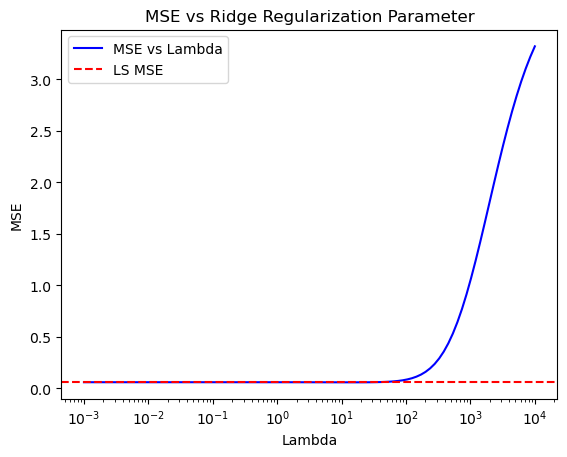

In [14]:
# Plot MSE vs Lambda
plt.plot(lambda_values, mse_values, color='blue', label='MSE vs Lambda')
plt.axhline(ls_mse, color='red', linestyle='dashed', label='LS MSE')  # LS reference line
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE vs Ridge Regularization Parameter')
plt.legend()
plt.show()

In [15]:
# Find optimal lambda range where MSE is smaller than LS MSE
optimal_lambda_range = lambda_values[np.array(mse_values) < ls_mse]
print("Range of Lambda where MSE < LS MSE:", optimal_lambda_range)

Range of Lambda where MSE < LS MSE: [1.00000000e-03 1.17681195e-03 1.38488637e-03 1.62975083e-03
 1.91791026e-03 2.25701972e-03 2.65608778e-03 3.12571585e-03
 3.67837977e-03 4.32876128e-03 5.09413801e-03 5.99484250e-03
 7.05480231e-03 8.30217568e-03 9.77009957e-03 1.14975700e-02
 1.35304777e-02 1.59228279e-02 1.87381742e-02 2.20513074e-02
 2.59502421e-02 3.05385551e-02 3.59381366e-02 4.22924287e-02
 4.97702356e-02 5.85702082e-02 6.89261210e-02 8.11130831e-02
 9.54548457e-02 1.12332403e-01 1.32194115e-01 1.55567614e-01
 1.83073828e-01 2.15443469e-01 2.53536449e-01 2.98364724e-01
 3.51119173e-01 4.13201240e-01 4.86260158e-01 5.72236766e-01
 6.73415066e-01 7.92482898e-01 9.32603347e-01 1.09749877e+00
 1.29154967e+00 1.51991108e+00 1.78864953e+00 2.10490414e+00
 2.47707636e+00 2.91505306e+00 3.43046929e+00 4.03701726e+00
 4.75081016e+00 5.59081018e+00 6.57933225e+00 7.74263683e+00
 9.11162756e+00 1.07226722e+01 1.26185688e+01 1.48496826e+01
 1.74752840e+01 2.05651231e+01 2.42012826e+01 2.8

## Exercise 22

In [19]:
mu = np.array([1, 1])
cov = np.array([[4, 3], [3, 5]])

# Generate 100 datasets, each with 50 samples
num_datasets = 100
N = 50
np.random.seed(42)
datasets = [np.random.multivariate_normal(mu, cov, N) for _ in range(num_datasets)]

In [20]:
# Compute the optimal MSE estimate E[y|x]
def optimal_mse_estimate(x):
    return mu[0] + (cov[0, 1] / cov[1, 1]) * (x - mu[1])

x_vals = np.linspace(-2, 4, 100)
y_vals = optimal_mse_estimate(x_vals)

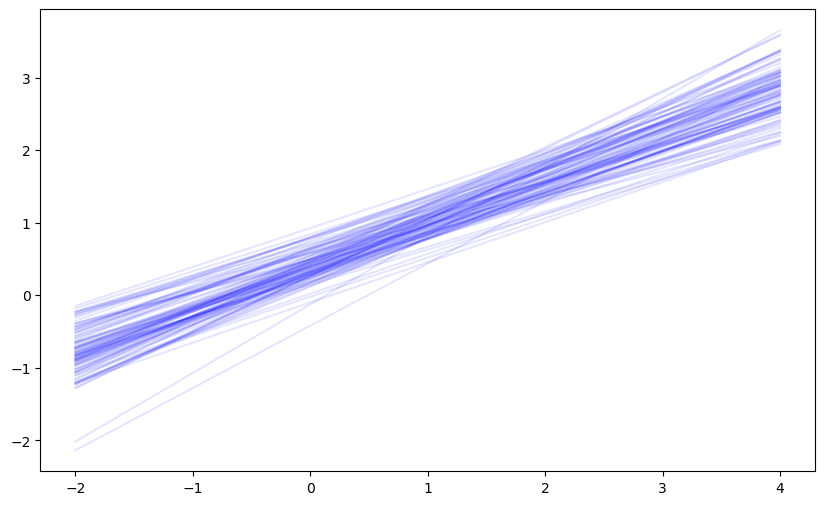

In [21]:
# Plot all 100 estimates with LS and compare with optimal MSE
plt.figure(figsize=(10, 6))
for dataset in datasets:
    x_sample = dataset[:, 1]
    y_sample = dataset[:, 0]
    poly_LS = make_pipeline(PolynomialFeatures(1), LinearRegression())
    poly_LS.fit(x_sample[:, np.newaxis], y_sample)
    plt.plot(x_vals, poly_LS.predict(x_vals[:, np.newaxis]), color='blue', alpha=0.1)

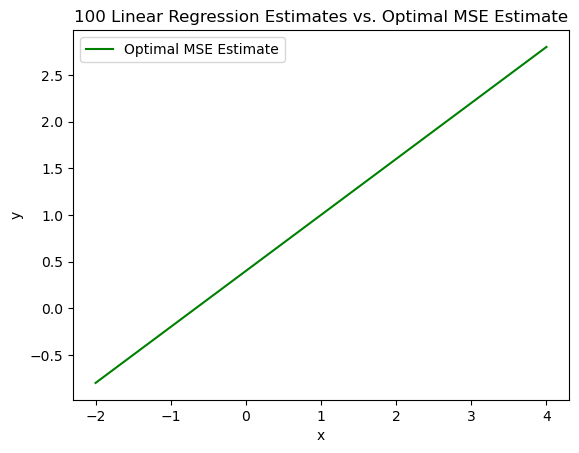

In [22]:
plt.plot(x_vals, y_vals, color='green', label='Optimal MSE Estimate')
plt.xlabel('x')
plt.ylabel('y')
plt.title('100 Linear Regression Estimates vs. Optimal MSE Estimate')
plt.legend()
plt.show()

## Exercise 23

In [33]:
N = 100
D = np.random.rand(N, 2)  # Generate dataset D of 100 pairs
x_sample = D[:, 0]
y_sample = D[:, 1]

In [24]:
# Compute the linear estimate that minimizes MSE
model = LinearRegression()
model.fit(x_sample.reshape(-1, 1), y_sample)
y_pred = model.predict(x_sample.reshape(-1, 1))

In [25]:
# Generate additional dataset D' of 50 points
d_prime = np.random.rand(50, 2)
x_prime = d_prime[:, 0]
y_prime_estimates = model.predict(x_prime.reshape(-1, 1))

In [26]:
# Compute the optimal MSE estimate E[y|x]
def optimal_mse_estimate(x):
    return np.mean(y_sample)  # Assuming a simple mean-based estimate

optimal_y_prime = optimal_mse_estimate(x_prime)

In [27]:
# Compare performance using Mean Squared Error
mse_linear = np.mean((y_prime_estimates - y_sample[:50]) ** 2)
mse_optimal = np.mean((optimal_y_prime - y_sample[:50]) ** 2)

print("MSE of Linear Estimate:", mse_linear)
print("MSE of Optimal Estimate:", mse_optimal)

MSE of Linear Estimate: 0.09198252499486449
MSE of Optimal Estimate: 0.08818439770320266


## Exercise 24

In [35]:
mu = np.array([1, 1])
cov = np.array([[4, 3], [3, 5]])
N = 100
D = np.random.multivariate_normal(mu, cov, N)
x_sample = D[:, 1]
y_sample = D[:, 0]

In [36]:
# Compute optimal MSE estimate using conditional expectation
def conditional_expectation(x):
    return mu[0] + (cov[0, 1] / cov[1, 1]) * (x - mu[1])

mse_estimates = [conditional_expectation(xi) for xi in x_sample]

In [37]:
# Compute empirical mean and covariance matrix
mu_estimated = np.mean(D, axis=0)
cov_estimated = np.cov(D, rowvar=False)

In [38]:
# Pretend we don't know the true distribution and use estimated values
estimated_mse_estimates = [mu_estimated[0] + (cov_estimated[0, 1] / cov_estimated[1, 1]) * (xi - mu_estimated[1]) for xi in x_sample]

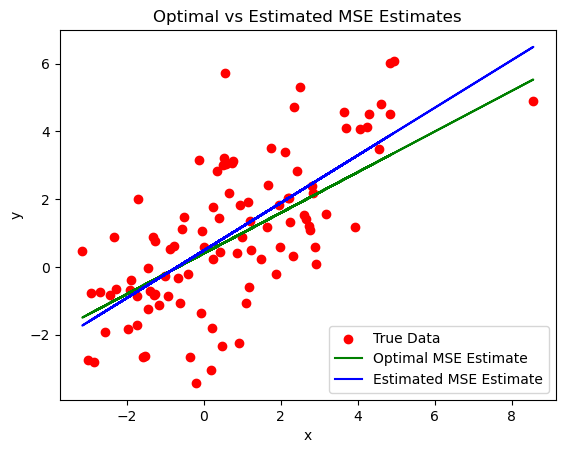

In [39]:
plt.scatter(x_sample, y_sample, color='red', label='True Data')
plt.plot(x_sample, mse_estimates, color='green', label='Optimal MSE Estimate')
plt.plot(x_sample, estimated_mse_estimates, color='blue', label='Estimated MSE Estimate')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimal vs Estimated MSE Estimates')
plt.legend()
plt.show()